In [1]:
'''Imports'''
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from prettytable import PrettyTable

'''Import Utils'''


'''Import Data'''
from sklearn.datasets import load_digits, fetch_california_housing

'''Import Data Processing Utilities'''
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, f1_score
from sklearn.decomposition import PCA

'''Import Predictors'''
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from skopt import BayesSearchCV

'''Import Tuning Utilities'''
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_objective, plot_histogram, plot_convergence, plot_gaussian_process
from sklearn.model_selection import GridSearchCV


In [2]:
'''Global Variables'''

scoringCriteria = [
    'positive_likelihood_ratio', 'f1_micro', 'v_measure_score', 'roc_auc_ovr_weighted',
    'adjusted_rand_score', 'neg_mean_squared_log_error', 'r2', 'precision_macro',
    'roc_auc_ovo_weighted', 'neg_median_absolute_error', 'matthews_corrcoef', 'precision_samples',
    'jaccard_micro', 'balanced_accuracy', 'precision_micro', 'recall_micro', 'f1_samples',
    'recall', 'jaccard', 'neg_mean_poisson_deviance', 'rand_score', 'jaccard_weighted',
    'neg_mean_absolute_percentage_error', 'precision_weighted', 'average_precision',
    'neg_log_loss', 'recall_samples', 'recall_weighted', 'accuracy', 'homogeneity_score',
    'neg_mean_absolute_error', 'adjusted_mutual_info_score', 'roc_auc', 'completeness_score',
    'f1_macro', 'roc_auc_ovo', 'recall_macro', 'top_k_accuracy', 'f1', 'roc_auc_ovr',
    'normalized_mutual_info_score', 'fowlkes_mallows_score', 'mutual_info_score', 'explained_variance',
    'max_error', 'neg_negative_likelihood_ratio', 'neg_brier_score', 'neg_mean_squared_error',
    'f1_weighted', 'neg_root_mean_squared_error', 'jaccard_samples', 'neg_mean_gamma_deviance',
    'jaccard_macro', 'precision'
    ]

In [3]:
'''Classifier data EDA'''
digits = load_digits()
# print(digits.keys())
# print(digits['data'][0])
# print(digits.target)

[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing classify, total=   0.0s
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        53
           1       0.70      0.76      0.73        50
           2       0.84      0.79      0.81        47
           3       0.82      0.87      0.85        54
           4       0.82      0.83      0.83        60
           5       0.90      0.91      0.90        66
           6       0.91      0.94      0.93        53
           7       0.90      0.84      0.87        55
           8       0.77      0.77      0.77        43
           9       0.84      0.81      0.83        59

    accuracy                           0.85       540
   macro avg       0.85      0.84      0.85       540
weighted avg       0.85      0.85      0.85       540



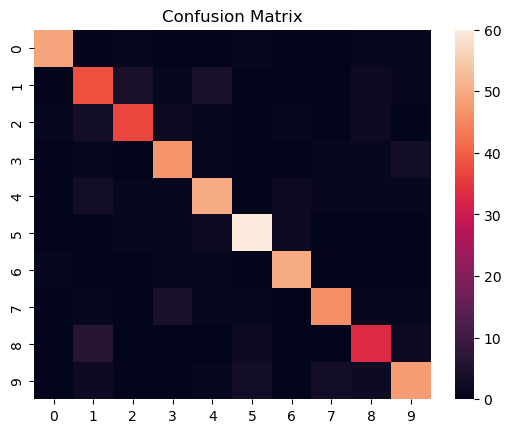

[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing classify, total=   0.1s
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.98      0.94      0.96        54
           4       0.97      1.00      0.98        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       0.95      0.98      0.96        55
           8       0.95      0.95      0.95        43
           9       0.96      0.92      0.94        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



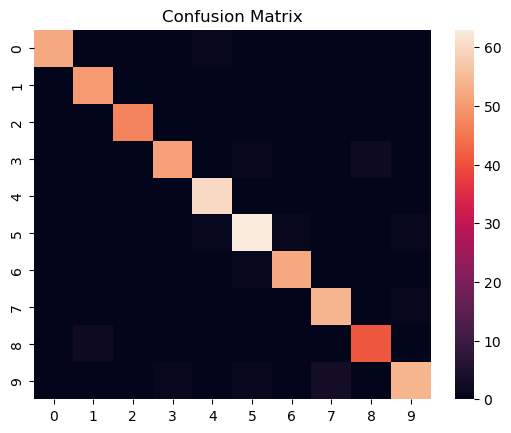

In [4]:
'''Default Classifier Performance'''
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)
for model in [DecisionTreeClassifier, RandomForestClassifier]:
    pipe = Pipeline([
        ('scale', StandardScaler()),
        # ('pca', PCA()),
        ('classify',model())],
    verbose=True)
    predicted = pipe.fit(X_train, y_train).predict(X_test)
    print(classification_report(y_test, predicted))
    sns.heatmap(confusion_matrix(y_test, predicted))
    plt.title('Confusion Matrix')
    plt.show()



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.09      1.00      0.17        50
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        54
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        66
           6       0.00      0.00      0.00        53
           7       0.00      0.00      0.00        55
           8       0.00      0.00      0.00        43
           9       0.00      0.00      0.00        59

    accuracy                           0.09       540
   macro avg       0.01      0.10      0.02       540
weighted avg       0.01      0.09      0.02       540



/Users/watsonblair/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/watsonblair/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/watsonblair/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


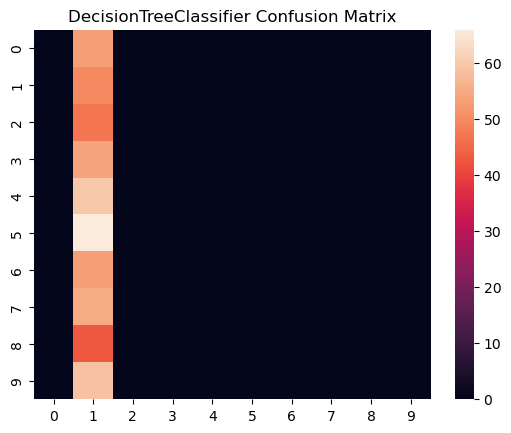

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        47
           3       0.19      0.96      0.32        54
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        66
           6       0.19      0.98      0.33        53
           7       0.00      0.00      0.00        55
           8       0.00      0.00      0.00        43
           9       0.00      0.00      0.00        59

    accuracy                           0.19       540
   macro avg       0.04      0.19      0.06       540
weighted avg       0.04      0.19      0.06       540



/Users/watsonblair/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/watsonblair/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/watsonblair/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


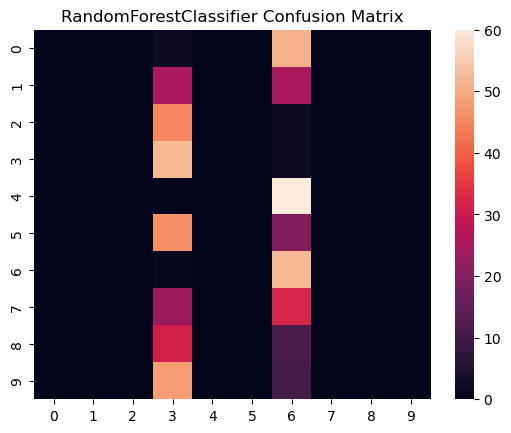

In [ ]:
'''Tuned Classifier Performance'''

# TODO: Model Tuning 
# Update the below to implement Bayesian Optimization model tuning.
# Use skopt.gp_minimize() vis a vi: https://machinelearningmastery.com/scikit-optimize-for-hyperparameter-tuning-in-machine-learning/
def f1(estimator, X_test, y_test):
    return f1_score(y_test, estimator.predict(X_test))

classifiers = {
    DecisionTreeClassifier.__name__: {
        'model': DecisionTreeClassifier,
        'paramSpace': {
            'classify__criterion': Categorical(['gini', 'entropy', 'log_loss']),
            'classify__splitter': Categorical(['best', 'random']),
            'classify__max_depth': Integer(1, 1000),
            'classify__min_samples_split': Real(0.1, 0.9),
            'classify__min_samples_leaf': Real(0.1, 0.9),
            'classify__min_weight_fraction_leaf': Real(0.0,0.5),
            'classify__max_features': Categorical(['sqrt', 'log2', None]),
            'classify__max_leaf_nodes': Integer(2, 2000), 
            'classify__min_impurity_decrease': Real(0.0, 1.0),
            'classify__ccp_alpha': Real(0.1, 0.9),
            'pca__n_components': Integer(1,50)
        }
    },
    RandomForestClassifier.__name__: {
        'model': RandomForestClassifier,
        'paramSpace': {
            'classify__n_estimators': Integer(10, 200),
            'classify__max_depth': Integer(1, 1000), 
            'classify__min_samples_split': Integer(2, 20), 
            'classify__min_samples_leaf': Real(0.1, 0.9),
            'classify__max_features': Categorical(['sqrt', 'log2', None]),
            'classify__bootstrap': Categorical([True, False]), 
            'classify__criterion': Categorical(['gini', 'entropy', 'log_loss']),
            'pca__n_components': Integer(1,10)
        }
    }
}



X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)
for name, classDict in classifiers.items():
    
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('pca', PCA()),
        ('classify',classDict['model']())],
    verbose=False)

    modelTuner = BayesSearchCV(
        pipe,
        classDict['paramSpace'],
        n_iter=500,
        cv=5,
        scoring='accuracy'
        # TODO: Use GridSearch for scoring criteria
        # NOTE: This will take 13 hours. Execute over night.
        # random_state=42 
        )
    modelTuner.fit(X_train, y_train)
    
    # search = BayesSearchCV(pipe, param_grid, n_jobs=2)
    # predicted = search.best_estimator_.predict(X_test)
    predicted = modelTuner.best_estimator_.predict(X_test)
    
    print(classification_report(y_test, predicted))
    sns.heatmap(confusion_matrix(y_test, predicted))
    plt.title(name + ' Confusion Matrix')
    plt.show()


In [7]:
'''Regressor data EDA'''
cal_housing = fetch_california_housing(as_frame=True)
# print(cal_housing.data)
# print(cal_housing.target)

outlierTable = PrettyTable(['Feature', 'Outlier Count'])

for column in cal_housing.data.columns:
    Q1 = cal_housing.data[column].quantile(0.25)
    Q3 = cal_housing.data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outlierCount = np.array(cal_housing.data[column] >= upper).sum() + np.array(cal_housing.data[column] <= lower).sum()
    outlierTable.add_row([column, outlierCount])
    # print(f"{column}: {outlierCount}")

print(outlierTable)


+------------+---------------+
|  Feature   | Outlier Count |
+------------+---------------+
|   MedInc   |      681      |
|  HouseAge  |       0       |
|  AveRooms  |      511      |
| AveBedrms  |      1424     |
| Population |      1198     |
|  AveOccup  |      711      |
|  Latitude  |       0       |
| Longitude  |       0       |
+------------+---------------+


In [8]:
'''Data Cleaning and Pre-Processing'''
cleanData = cal_housing.data
cleanData['y'] = cal_housing.target

cleanData = cleanData.drop(columns=['Longitude', 'Latitude'])
for feature in ['AveBedrms', 'AveRooms', 'AveOccup', 'Population']:
    cleanData = cleanData[(np.abs(stats.zscore(cleanData[feature])) < 2.5)]
cleanTarget = cleanData['y'].to_list()

# DATA CLEANING TODOs
# TODO: Bin Lat/Long groupings into city/town clusters. look for available geo-fencing data for cluster labeling - can we do a graph of centroids on top of map?
# TODO: Fix Skew for Population, MedIncome, AvgOccup, AvgBedroom, Target
# TODO: Feature Engineering / Reduction
cleanData.drop(columns=['y'], inplace=True)

/Users/watsonblair/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


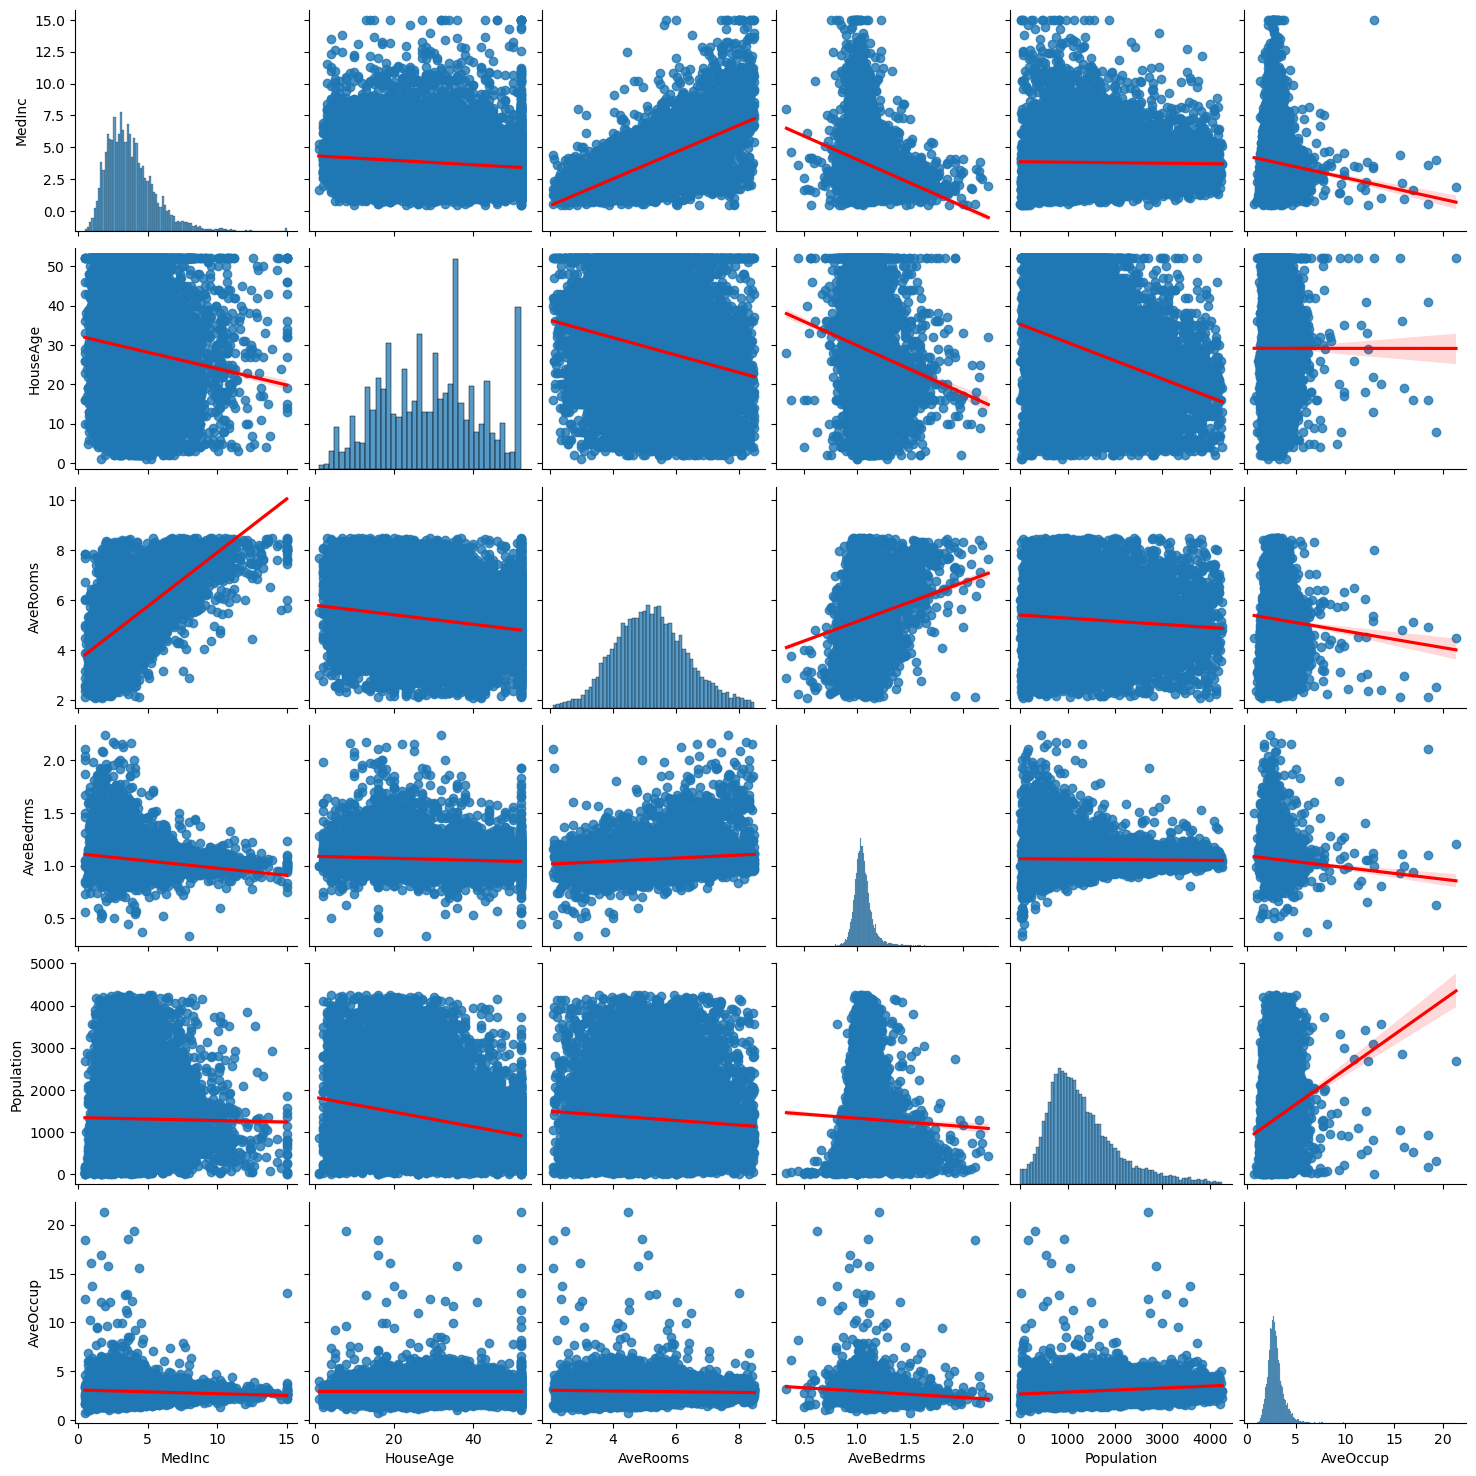

In [9]:
'''Plot clean features to explore relationships'''
plotData = cleanData.copy()
plotData['y'] = cleanTarget.copy()

# sns.pairplot(plotData, hue='y')
sns.pairplot(plotData.drop(columns=['y']), kind='reg', plot_kws={'line_kws':{'color':'red'}})


<Axes: xlabel='y', ylabel='Count'>

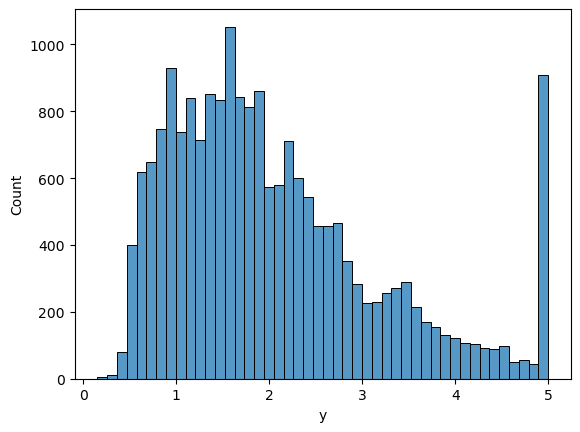

In [10]:
'''Show distribution of Target Value'''
sns.histplot(data=plotData, x='y')

/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_87659/3241867622.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bin2 = plotData[plotData['y'] > 1][plotData['y'] <= 2]
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_87659/3241867622.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bin3 = plotData[plotData['y'] > 2][plotData['y'] <= 3]
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_87659/3241867622.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bin4 = plotData[plotData['y'] > 3][plotData['y'] <= 4]


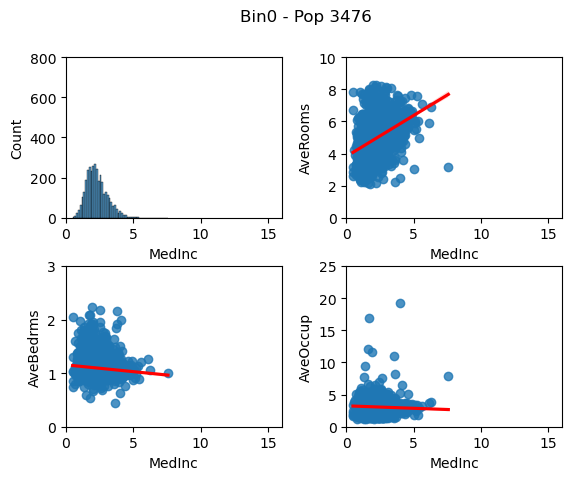

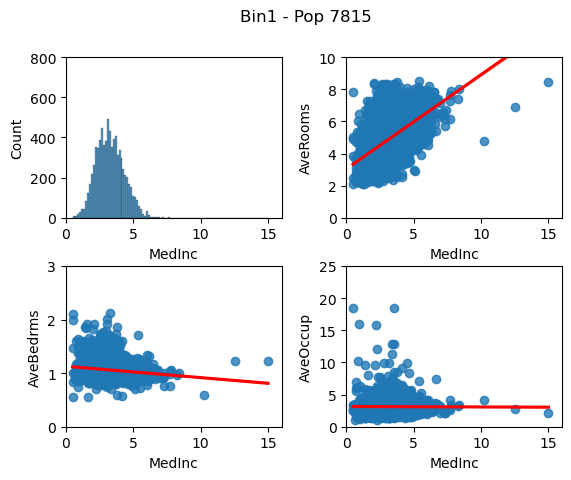

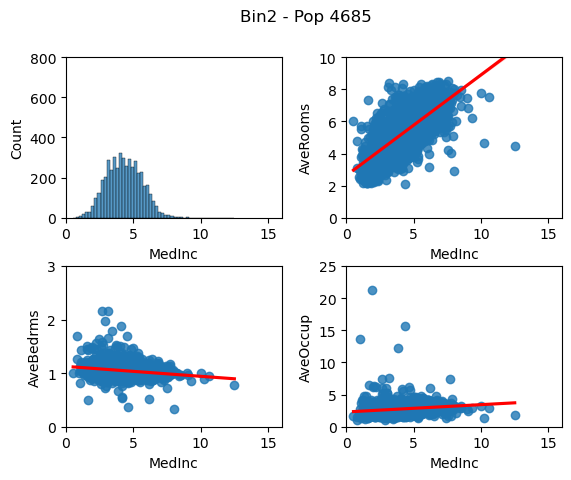

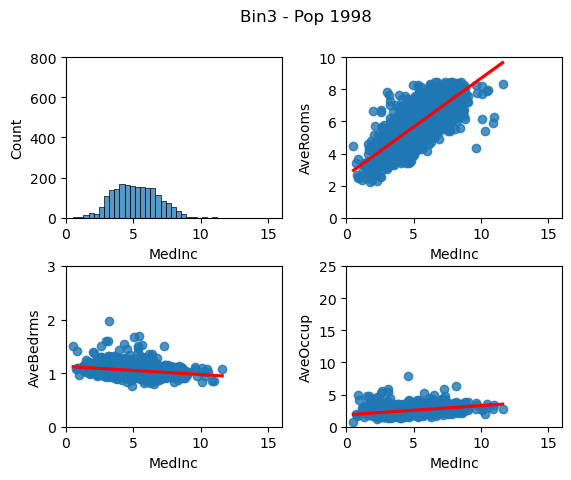

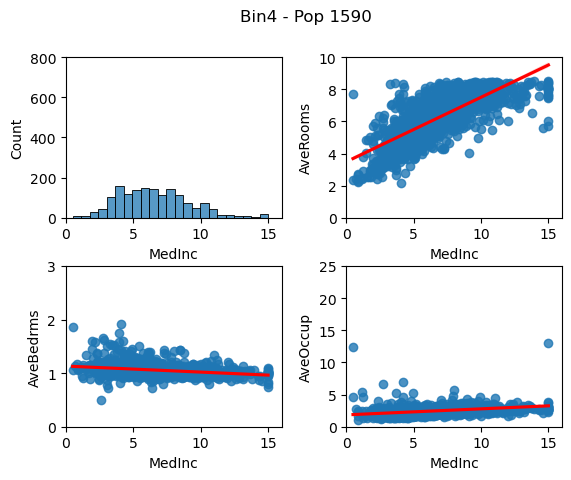

In [11]:
'''Plot data by Bin'''
bin1 = plotData[plotData['y'] < 1]
bin2 = plotData[plotData['y'] > 1][plotData['y'] <= 2]
bin3 = plotData[plotData['y'] > 2][plotData['y'] <= 3]
bin4 = plotData[plotData['y'] > 3][plotData['y'] <= 4]
bin5 = plotData[plotData['y'] > 4]

for index, bin in enumerate([bin1, bin2, bin3, bin4, bin5]):
    fig, axs = plt.subplots(ncols=2, nrows=2)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig.suptitle('Bin'+str(index)+' - Pop '+str(len(bin)))
    sns.histplot(x='MedInc', data=bin, ax=axs[0,0])
    axs[0,0].set_ylim(bottom=0, top=800)
    axs[0,0].set_xlim(left=0, right=16)
    sns.regplot(x='MedInc', y='AveRooms', data=bin, ax=axs[0,1], line_kws={'color':'red'})
    axs[0,1].set_ylim(bottom=0, top=10)
    axs[0,1].set_xlim(left=0, right=16)
    sns.regplot(x='MedInc', y='AveBedrms', data=bin, ax=axs[1,0], line_kws={'color':'red'})
    axs[1,0].set_ylim(bottom=0, top=3.0)
    axs[1,0].set_xlim(left=0, right=16)
    # sns.countplot(x='MedInc', data=bin, ax=axs[1,1])
    sns.regplot(x='MedInc', y='AveOccup', data=bin, ax=axs[1,1], line_kws={'color':'red'})

    axs[1,1].set_ylim(bottom=0, top=25)
    axs[1,1].set_xlim(left=0, right=16)
    plt.show()


In [ ]:
'''Default Regressor Performance'''
modelData = cleanData.copy()

# TODO: How does normalization vs standardization impact model performance
transformPipeline = [
    ('scaler', StandardScaler()),
    # ('feature_reduction', PCA(n_components=5,iterated_power=7))
    ]

X_train, X_test, y_train, y_test = train_test_split(modelData, cleanTarget, test_size=0.3, random_state=42)
for regressor in [DecisionTreeRegressor, RandomForestRegressor]:
    pipe = Pipeline(transformPipeline + [('regress',regressor())], verbose=True)
    predicted = pipe.fit(X_train, y_train).predict(X_test)
    mse = mean_squared_error(y_test, predicted)
    print(regressor.__name__)
    print(mse)
    
    
    # TODO: Graph Regression Plane using skopt.plots
    # NOTE: PCA to force data into 3d space
    # feat1 = [x for x,_,_ in newX]
    # feat2 = [x for _,x,_ in newX]
    # feat3 = [x for _,_,x in newX]
    
    # fig = plt.figure()
    # ax = fig.add_subplot(projection='3d')
    
    # ax.scatter(feat1, feat2, feat3, label='Data')
    # ax.plot(y_test, predicted, color='red', label='Regression Line')
    # ax.set_xlabel('PCA 1')
    # ax.set_ylabel('PCA 2')
    # ax.set_zlabel('PCA 3')
    # ax.legend()
    # plt.title((f'Linear Regression (MSE: {mse:.2f})'))
    # plt.show()


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing regress, total=   0.1s
DecisionTreeRegressor
0.8029563747766982
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing regress, total=   5.9s
RandomForestRegressor
0.4263887013030129


In [31]:
'''Tuned Regressor Performance'''
# TODO: Pipeline Tuning 
# TODO: Feature Reduction - reduce specific features
def mean_sq_err(predictor, X_test, y_test):
    predicted = predictor.predict(X_test)
    return mean_squared_error(y_test, predicted)


# TODO: Explore how increased demetionality in the parameter space impacts optimization performance
regressors = {
    DecisionTreeRegressor.__name__: {
        'model': DecisionTreeRegressor,
        'paramSpace': {
            'regress__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'regress__splitter': ['best', 'random'],
            'regress__max_depth': Integer(2, 1000),
            'regress__min_samples_split': Real(0.1, 0.9),
            'regress__min_samples_leaf': Real(0.1, 0.9),
            'regress__min_weight_fraction_leaf': Real(0.0, 0.5),
            'regress__max_features': ['sqrt', 'log2', None],
            'regress__max_leaf_nodes': Integer(2, 1000),
            'regress__ccp_alpha': Real(0.1, 0.9),
        }
    },
    RandomForestRegressor.__name__: {
        'model': RandomForestRegressor,
        'paramSpace': {
            'regress__n_estimators': Integer(10, 200),
            'regress__max_depth': Integer(1, 1000), 
            'regress__min_samples_split': Real(0.1, 0.9),
            'regress__min_samples_leaf': Real(0.1, 0.9),
            'regress__max_features': Categorical(['sqrt', 'log2']), 
            'regress__criterion': Categorical(['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
            'regress__min_weight_fraction_leaf': Real(0.1, 0.5),
            # 'regress__max_features': Real(0.1,0.9),
            # 'regress__max_leaf_nodes': Integer(2,1000),
            'regress__min_impurity_decrease': Real(0.1, 0.9),
            'regress__oob_score': [True, False],
            # 'regress__n_jobs': [10],
            # 'regress__random_state': [42],
            'regress__warm_start': [True, False],
            'regress__ccp_alpha': Real(0.1, 0.9),
            'regress__max_samples': Real(0.1, 0.9),
        }
    }
}

transformPipeline = [
    ('scaler', StandardScaler()),
    # ('feature_reduction', PCA())
    ]
tunedModel = {}
X_train, X_test, y_train, y_test = train_test_split(modelData, cleanTarget, test_size=0.3, random_state=42)
for name, regDict in regressors.items():
    pipe = Pipeline(transformPipeline + [('regress',regDict['model']())])
    tunedModel[name] = BayesSearchCV(
        pipe,
        regDict['paramSpace'],
        n_iter=10,
        cv=20,
        # scoring = scoringCriteria[i]
        # TODO: Use GridSearchCV for scoringCriteria param space
        # NOTE: This will take 13 hours. Execute over night.
        )
    tunedModel[name].fit(X_train, y_train)
    predicted = tunedModel[name].best_estimator_.predict(X_test)
    print('Evaluation Metric:', tunedModel[name].get_params()['scoring'])
    print("val. score: %s" % tunedModel[name].best_score_)
    print("test score: %s" % tunedModel[name].score(X_test, y_test))
    

Evaluation Metric: None
val. score: -0.001310285751748952
test score: -5.273232375202497e-07
Evaluation Metric: None
val. score: 0.16739133816281046
test score: 0.16864301242605118


In [ ]:
'''Explore Optimizer'''
# tunedModel[DecisionTreeRegressor.__name__].optimizer_results_
# .models[-1]
# print([x for x in regressors[DecisionTreeRegressor.__name__]['paramSpace'].keys()])

[          fun: 0.001310285751748952
             x: [0.8903198476419986, 'poisson', 995, 'sqrt', 297, 0.5828450191983786, 0.5493202549873172, 0.41274702011288694, 'best']
     func_vals: [ 5.458e-02  1.310e-03  1.310e-03  1.310e-03  1.310e-03
                  1.310e-03  1.310e-03  5.458e-02  5.458e-02  5.458e-02]
       x_iters: [[0.5373057273738286, 'absolute_error', 143, None, 81, 0.4191294429365685, 0.6737623388760807, 0.4034661848095142, 'best'], [0.8903198476419986, 'poisson', 995, 'sqrt', 297, 0.5828450191983786, 0.5493202549873172, 0.41274702011288694, 'best'], [0.6674059681712203, 'squared_error', 370, None, 19, 0.8810536923855449, 0.16801427156876622, 0.3363123254111357, 'random'], [0.31112908388787025, 'friedman_mse', 39, 'sqrt', 392, 0.41787571848848637, 0.3020066558120348, 0.1614390064346258, 'random'], [0.720267463199491, 'squared_error', 634, 'sqrt', 254, 0.5423709918730942, 0.776421517933265, 0.4095256135850956, 'best'], [0.39749638130624154, 'squared_error', 140, 'sqr

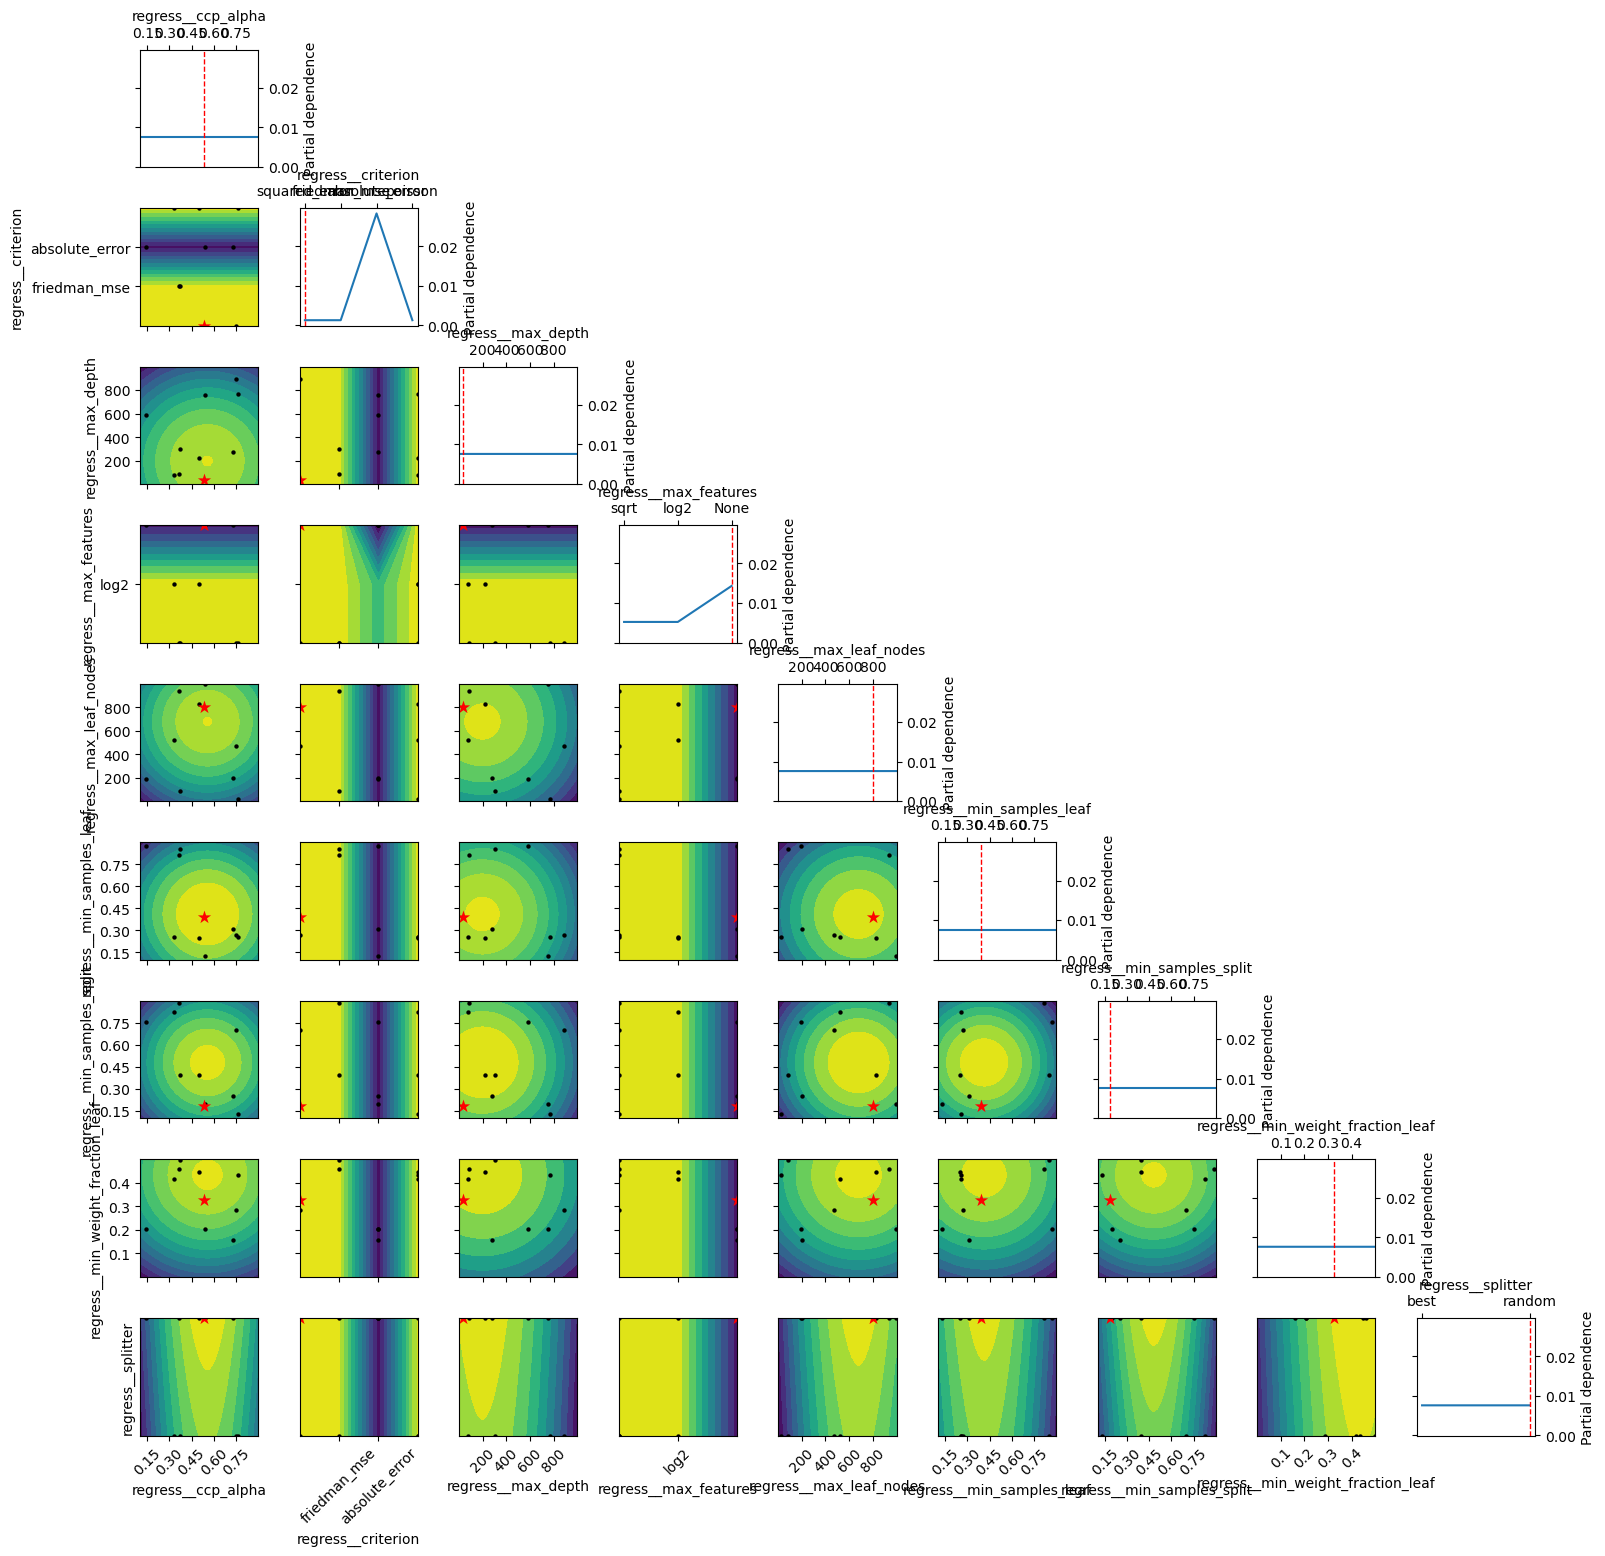

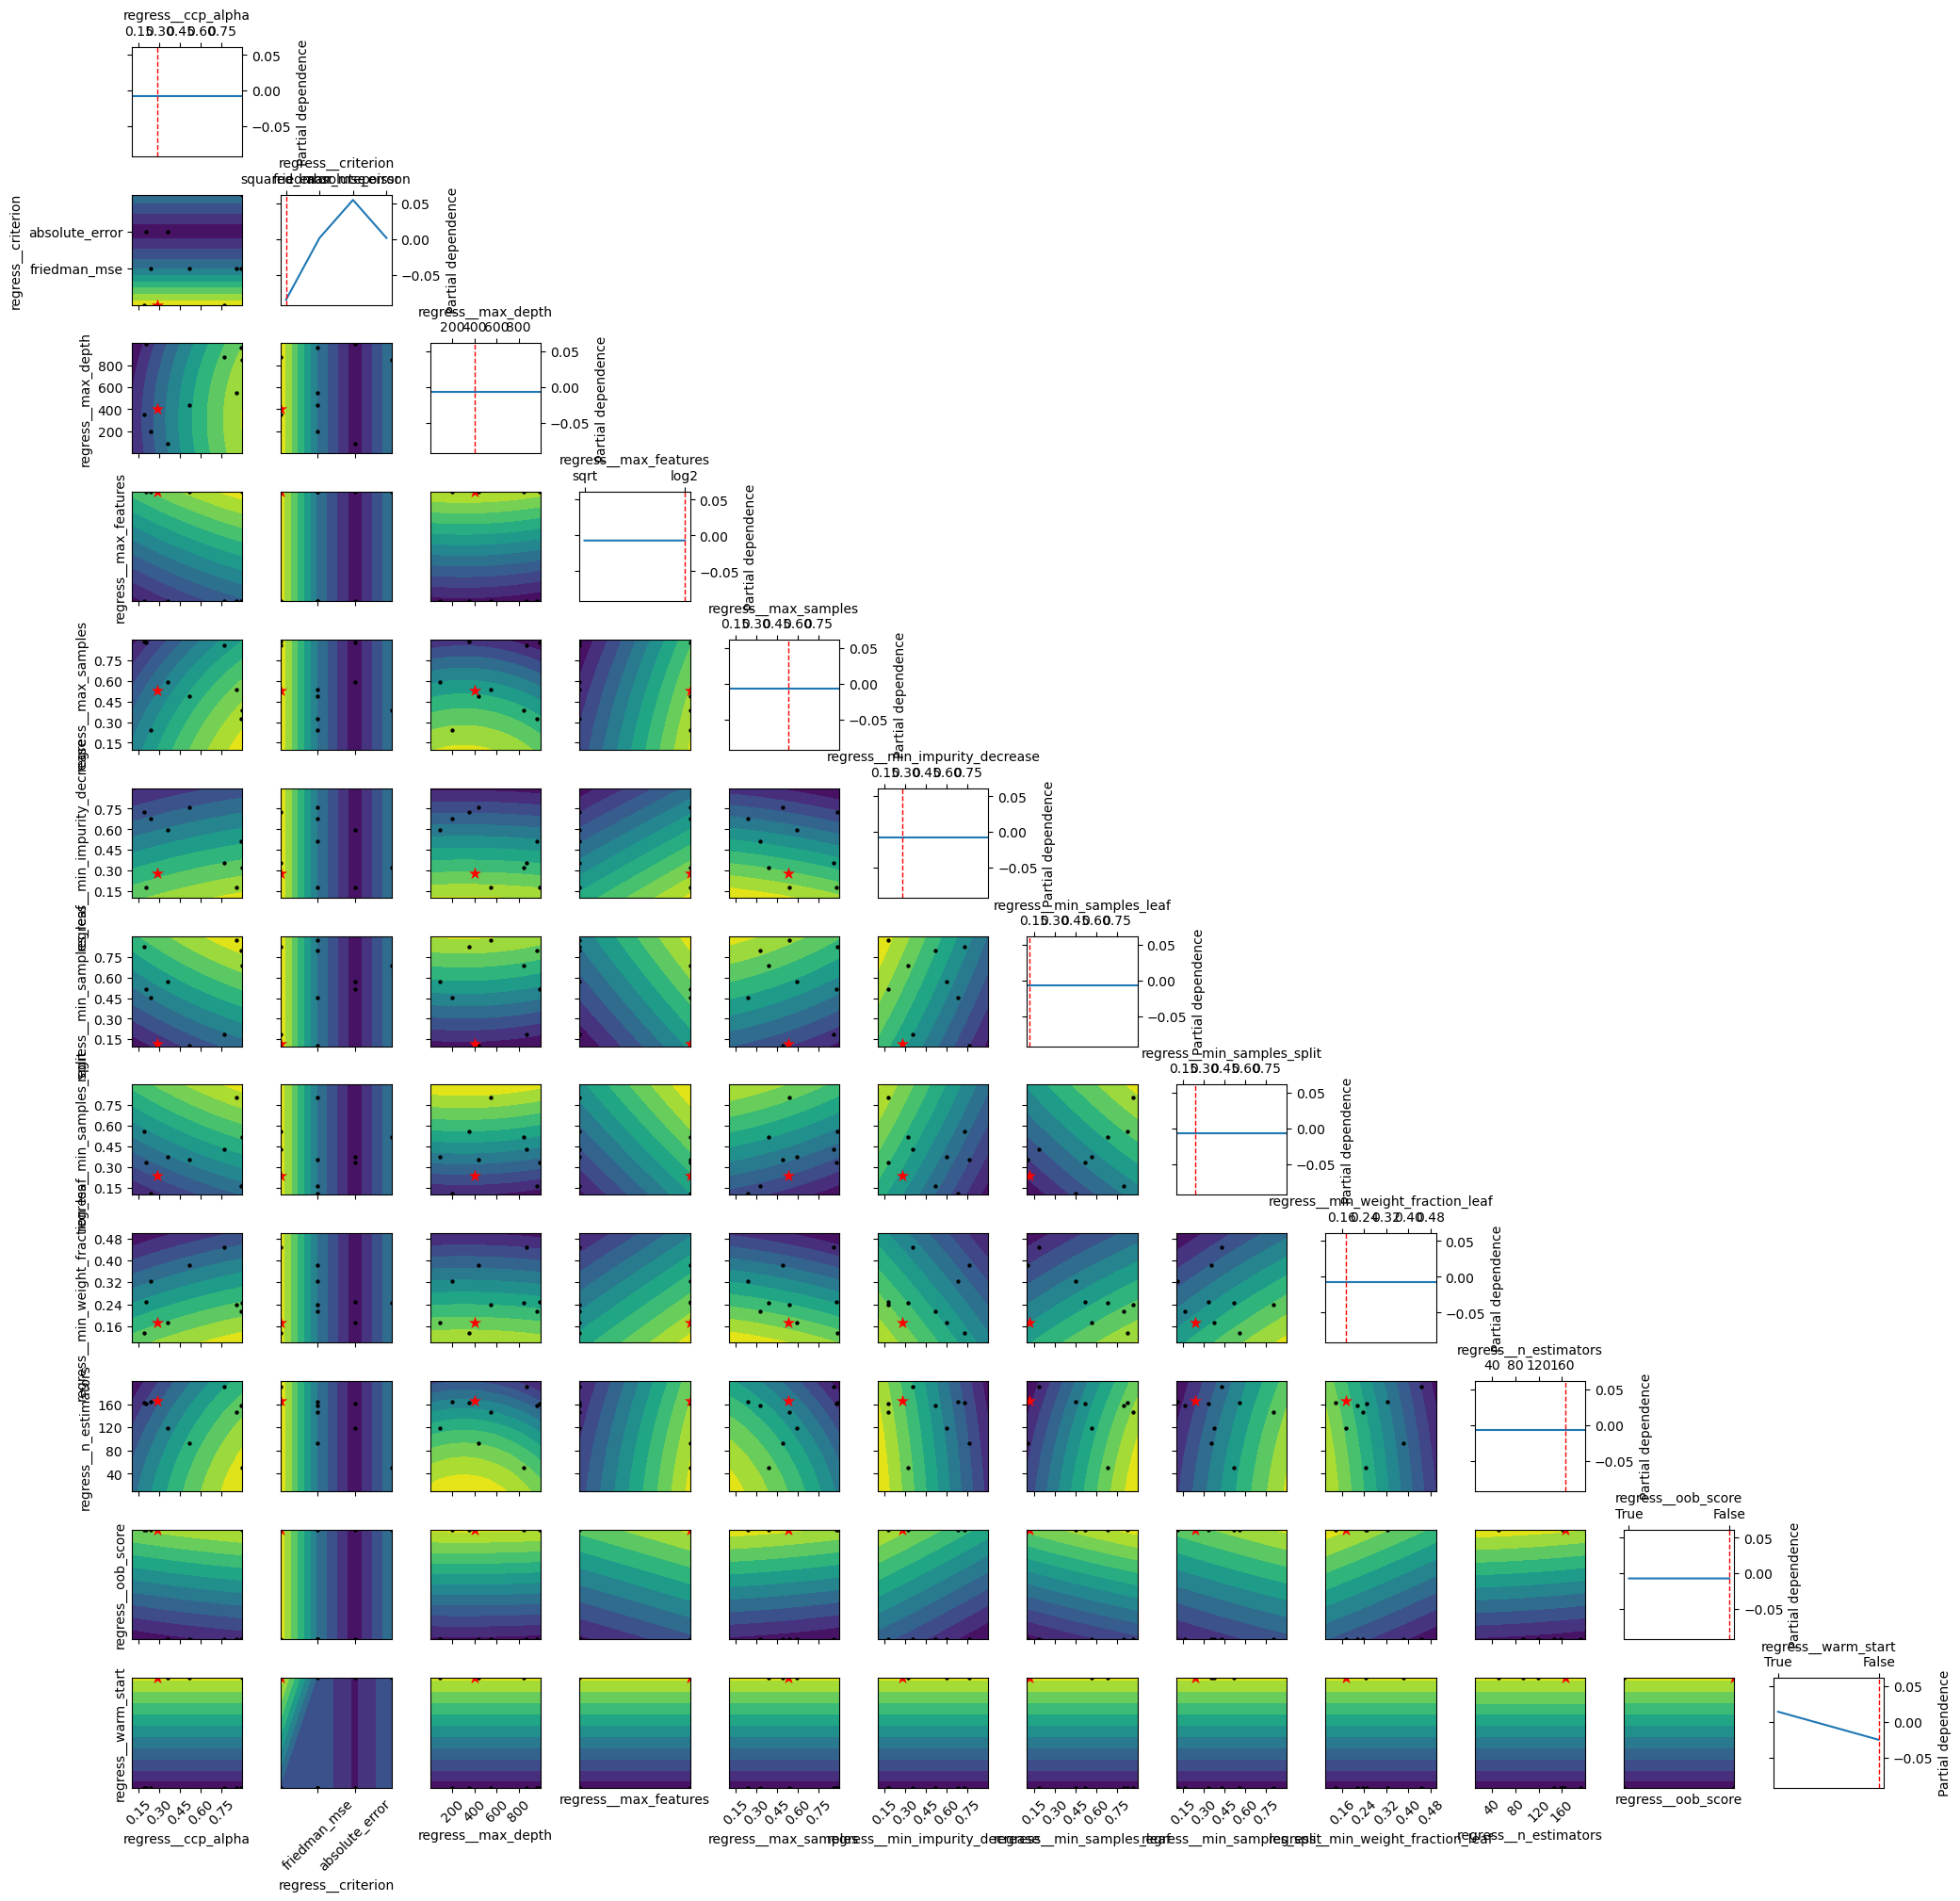

In [ ]:
'''Plot Optimization Paths'''
for name, model in tunedModel.items():
    _ = plot_objective(result=model.optimizer_results_[0],
                    n_minimum_search=int(1e8))
    plt.show()
